In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click to toggle code"></form>''')

In [1]:
import ROOT

# SR0, Wall Leakage, pax_v6.4.2, PDF
* Yuehuan Wei, August, 2017

In [1]:
#%%capture
#!rm -Rf ~/.cache/rootpy pax_* 
import numpy as np
np.set_printoptions(threshold=400)
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates          # for plotting dates
from matplotlib import gridspec            # to arrange the plots nicely
from scipy.optimize import curve_fit       # curve fitting libraries
from IPython.display import Image
from IPython.core.display import HTML 
from matplotlib.colors import LogNorm
from collections import defaultdict
from array import array

In [2]:
from pandas import read_hdf
df_new = read_hdf('sr0_pax642.h5', 'df')
print (len(df_new))

2328


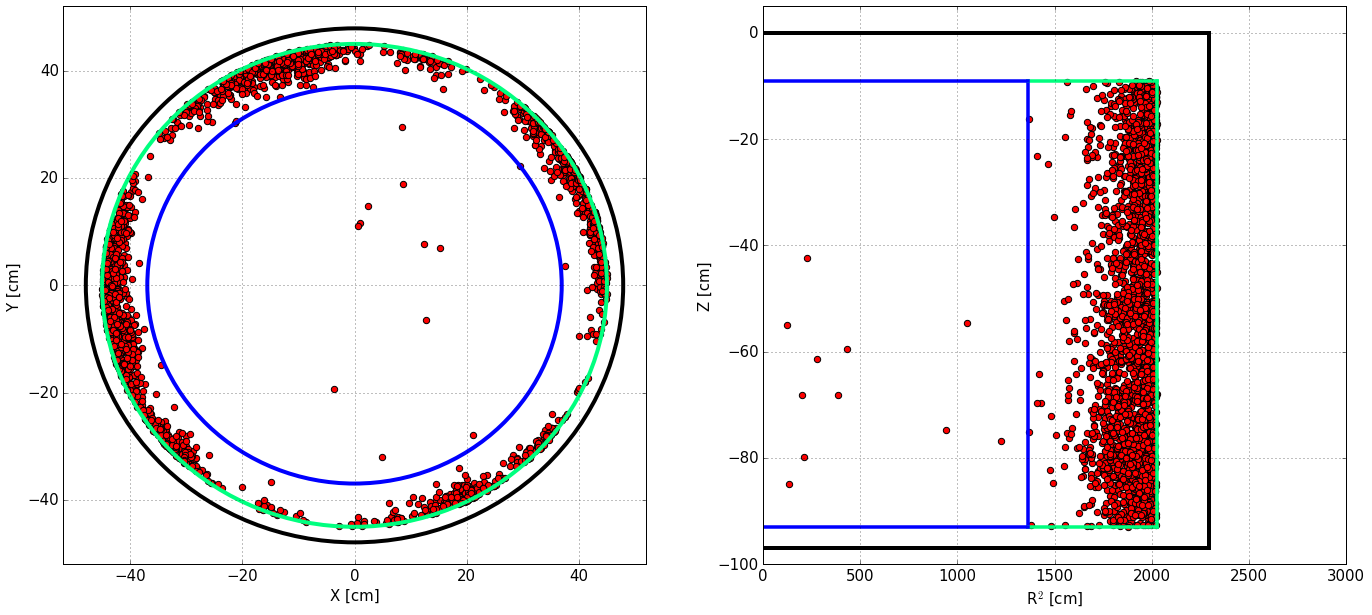

In [3]:
fig_sig= plt.figure(figsize = (23, 10))

plt.subplot(121)

plt.scatter(df_new.x, df_new.y, s=40, c='red')
plt.xlim(-52, 52)
plt.ylim(-52, 52)
plt.xlabel('X [cm]', fontsize =15)
plt.ylabel('Y [cm]', fontsize =15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.gca().add_artist(plt.Circle((0, 0), 47.9, color='black', fill=None, lw=4.))
plt.gca().add_artist(plt.Circle((0, 0), 36.94, color='blue', fill=None,  lw=4., linestyle = '-'))
plt.gca().add_artist(plt.Circle((0, 0), 45, color='springgreen', fill=None,  lw=4., linestyle = '-'))
plt.grid(True)

#--------------------------------------------------------------------------------------------
plt.subplot(122)
plt.scatter((df_new.x**2 + df_new.y**2), df_new.z,  s=40, c='red')
plt.xlim(0, 3000)
plt.ylim(-100, 5)
plt.xlabel('R$^2$ [cm]', fontsize =15)
#plt.xscale('log')
plt.ylabel('Z [cm]', fontsize =15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)

#Target Mass: 
plt.plot([0, 47.9**2], [0, 0], color = 'black', linestyle='-', linewidth = 4)
plt.plot([0, 47.9**2], [-96.9, -96.9], color = 'black', linestyle='-', linewidth = 4)
plt.plot([47.9**2, 47.9**2], [-96.9, 0], color = 'black', linestyle='-', linewidth = 4)

#FV:
plt.plot([36.94**2, 36.94**2], [-92.9, -9], color = 'blue', linestyle='-', linewidth = 3.5)

plt.plot([45**2, 45**2], [-92.9, -9], color = 'springgreen', linestyle='-', linewidth = 3.5)
plt.plot([36.94**2, 45**2], [-9, -9], color = 'springgreen', linestyle='-', linewidth = 3.5)
plt.plot([36.94**2, 45**2], [-92.9, -92.9], color = 'springgreen', linestyle='-', linewidth = 3.5)

plt.plot([0, 36.94**2], [-92.9, -92.9], color = 'blue', linestyle='-', linewidth = 3.5)
plt.plot([0, 36.94**2], [-9, -9], color = 'blue', linestyle='-', linewidth = 3.5)

plt.show()

In [4]:
df_new['log_cs2bot_cs1'] = np.log10(df_new.cs2_bottom/df_new.cs1)
df_new['log_cs2_cs1'] = np.log10(df_new.cs2/df_new.cs1)

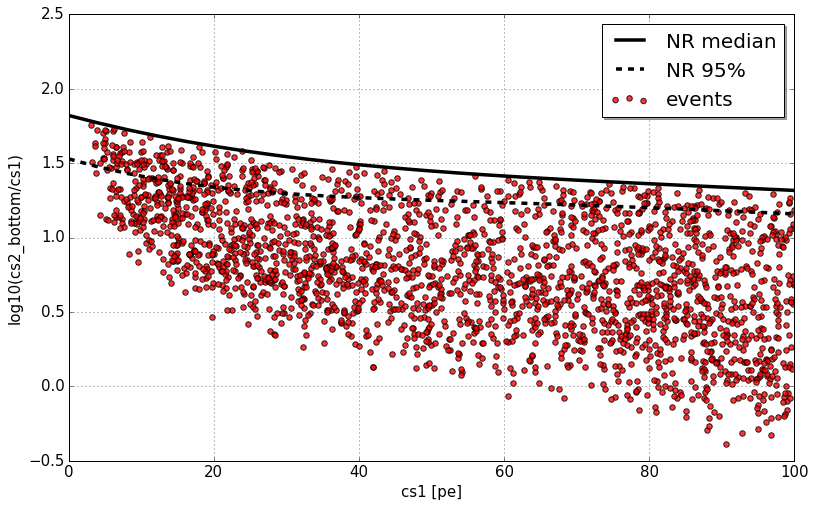

In [5]:
### set cut with random line discriminition:

fig_sig= plt.figure(figsize = (13,8))

plt.scatter(df_new.cs1, df_new.log_cs2bot_cs1, s=30, c='red', alpha = 0.8, label='events')

plt.xlim(0, 100)
plt.ylim(-0.5, 2.5)

plt.xlabel('cs1 [pe]', fontsize =15)
plt.ylabel('log10(cs2_bottom/cs1)', fontsize =15)
plt.grid(True)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.plot(xvalues, nr_median['pidbottom'](xvalues), label='NR median', color='black', linestyle = '-', lw=3.5)
#plt.plot(xvalues, nr_95['pidbottom'](xvalues), label='NR 95%', color='black', linestyle = '--', lw=3.5)
#legend = plt.legend(loc='upper right', shadow=True)

#plt.axvline(1.5, color='tan', linestyle='-', linewidth = 30)

# NR median
#========================================================================
nr_median = {'pid': np.poly1d( [1.9846795358916394e-09, -8.9960948861885862e-07, 0.00014845814391104396, -0.012869279612389997, 2.2566980076386964] ),
             'pidbottom' : np.poly1d( [2.043947952100446e-09, -9.2634141775575512e-07, 0.00015175759051522079, -0.012991863588418901, 1.8206807429394156] )    
            }

nr_95 = {'pid' : np.poly1d( [-2.9166458074656073e-11, 1.470169127820138e-08, -2.7684612569188748e-06, 0.00024507839732739513, -0.012098969366058176, 1.9450229233778022] ),
        'pidbottom' : np.poly1d( [-3.6445795328845042e-11, 1.8824918011275691e-08, -3.5948810050628432e-06, 0.00031555965062656963, -0.014484541097406578, 1.5290305282532244])}

xvalues = np.linspace(0,200)
#========================================================================

plt.plot(xvalues, nr_median['pidbottom'](xvalues), label='NR median', color='black', linestyle = '-', lw=3.5)
plt.plot(xvalues, nr_95['pidbottom'](xvalues), label='NR 95%', color='black', linestyle = '--', lw=3.5)

legend = plt.legend(loc='upper right', fontsize = 20,shadow=True)

plt.show()

** blind cut:**

In [6]:
df_blind = df_new[(np.log10(df_new.cs2/df_new.cs1) > 
                   np.exp(-0.720893+(-0.032622)*df_new.cs1) + 1.883038 + (-7.185652e-04)*df_new.cs1) |
                  (df_new.cs1 > 200) | 
                  (df_new.s2<150) | 
                  (df_new.largest_other_s2>200)]

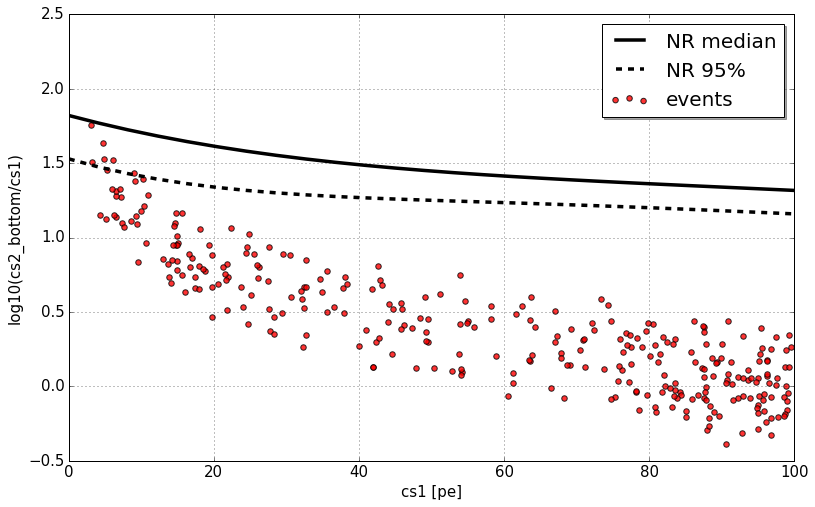

In [7]:
### set cut with random line discriminition:

fig_sig= plt.figure(figsize = (13,8))

plt.scatter(df_blind.cs1, df_blind.log_cs2bot_cs1, s=30, c='red', alpha = 0.8, label='events')

plt.xlim(0, 100)
plt.ylim(-0.5, 2.5)

plt.xlabel('cs1 [pe]', fontsize =15)
plt.ylabel('log10(cs2_bottom/cs1)', fontsize =15)
plt.grid(True)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.plot(xvalues, nr_median['pidbottom'](xvalues), label='NR median', color='black', linestyle = '-', lw=3.5)
#plt.plot(xvalues, nr_95['pidbottom'](xvalues), label='NR 95%', color='black', linestyle = '--', lw=3.5)
#legend = plt.legend(loc='upper right', shadow=True)

#plt.axvline(1.5, color='tan', linestyle='-', linewidth = 30)

# NR median
#========================================================================
nr_median = {'pid': np.poly1d( [1.9846795358916394e-09, -8.9960948861885862e-07, 0.00014845814391104396, -0.012869279612389997, 2.2566980076386964] ),
             'pidbottom' : np.poly1d( [2.043947952100446e-09, -9.2634141775575512e-07, 0.00015175759051522079, -0.012991863588418901, 1.8206807429394156] )    
            }

nr_95 = {'pid' : np.poly1d( [-2.9166458074656073e-11, 1.470169127820138e-08, -2.7684612569188748e-06, 0.00024507839732739513, -0.012098969366058176, 1.9450229233778022] ),
        'pidbottom' : np.poly1d( [-3.6445795328845042e-11, 1.8824918011275691e-08, -3.5948810050628432e-06, 0.00031555965062656963, -0.014484541097406578, 1.5290305282532244])}

xvalues = np.linspace(0,200)
#========================================================================

plt.plot(xvalues, nr_median['pidbottom'](xvalues), label='NR median', color='black', linestyle = '-', lw=3.5)
plt.plot(xvalues, nr_95['pidbottom'](xvalues), label='NR 95%', color='black', linestyle = '--', lw=3.5)

legend = plt.legend(loc='upper right', fontsize = 20,shadow=True)

plt.show()

In [8]:
print (len(df_blind))

310


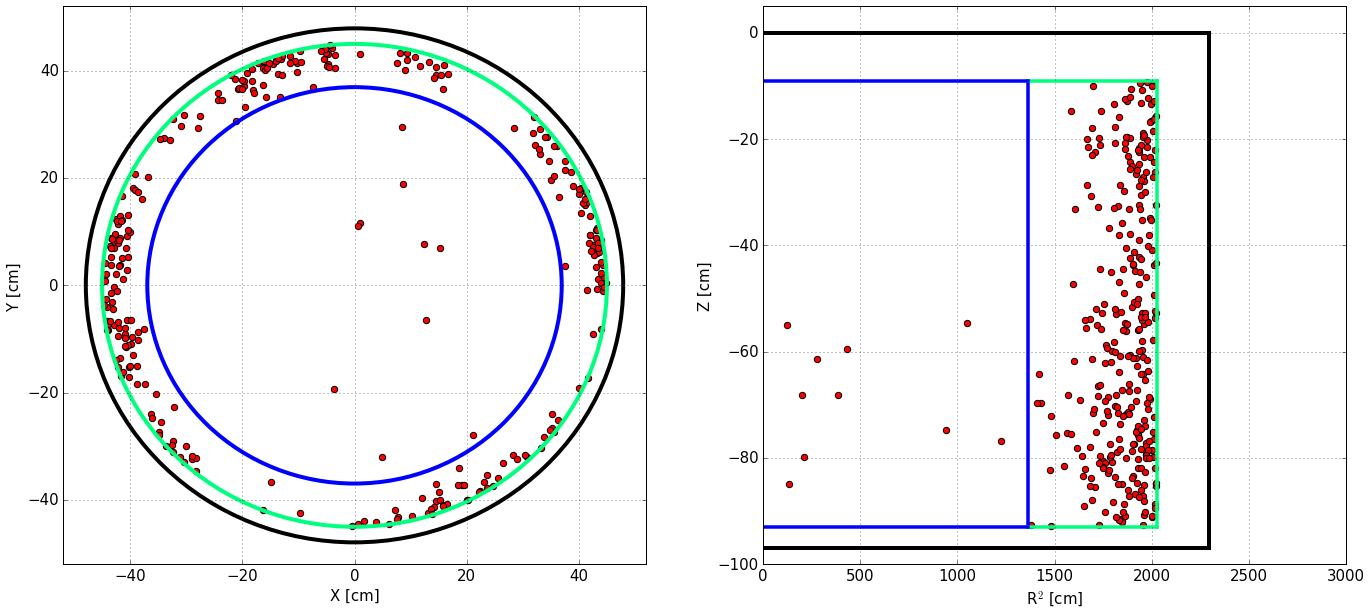

In [9]:
fig_sig= plt.figure(figsize = (23, 10))

plt.subplot(121)

plt.scatter(df_blind.x, df_blind.y, s=40, c='red')
plt.xlim(-52, 52)
plt.ylim(-52, 52)
plt.xlabel('X [cm]', fontsize =15)
plt.ylabel('Y [cm]', fontsize =15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.gca().add_artist(plt.Circle((0, 0), 47.9, color='black', fill=None, lw=4.))
plt.gca().add_artist(plt.Circle((0, 0), 36.94, color='blue', fill=None,  lw=4., linestyle = '-'))
plt.gca().add_artist(plt.Circle((0, 0), 45, color='springgreen', fill=None,  lw=4., linestyle = '-'))
plt.grid(True)

#--------------------------------------------------------------------------------------------
plt.subplot(122)
plt.scatter((df_blind.x**2 + df_blind.y**2), df_blind.z,  s=40, c='red')
plt.xlim(0, 3000)
plt.ylim(-100, 5)
plt.xlabel('R$^2$ [cm]', fontsize =15)
#plt.xscale('log')
plt.ylabel('Z [cm]', fontsize =15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)

#Target Mass: 
plt.plot([0, 47.9**2], [0, 0], color = 'black', linestyle='-', linewidth = 4)
plt.plot([0, 47.9**2], [-96.9, -96.9], color = 'black', linestyle='-', linewidth = 4)
plt.plot([47.9**2, 47.9**2], [-96.9, 0], color = 'black', linestyle='-', linewidth = 4)

#FV:
plt.plot([36.94**2, 36.94**2], [-92.9, -9], color = 'blue', linestyle='-', linewidth = 3.5)

plt.plot([45**2, 45**2], [-92.9, -9], color = 'springgreen', linestyle='-', linewidth = 3.5)
plt.plot([36.94**2, 45**2], [-9, -9], color = 'springgreen', linestyle='-', linewidth = 3.5)
plt.plot([36.94**2, 45**2], [-92.9, -92.9], color = 'springgreen', linestyle='-', linewidth = 3.5)

plt.plot([0, 36.94**2], [-92.9, -92.9], color = 'blue', linestyle='-', linewidth = 3.5)
plt.plot([0, 36.94**2], [-9, -9], color = 'blue', linestyle='-', linewidth = 3.5)

plt.show()

** Radius Cut: **

In [10]:
df_blind = df_blind[(df_blind.x**2 + df_blind.y**2 > 36.94**2)]

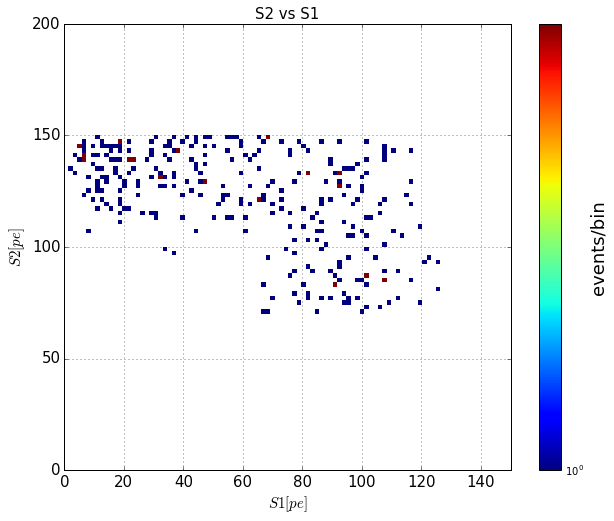

In [11]:
fig_s1 = plt.figure(figsize = (10, 8))

s1space = plt.hist2d(df_blind.s1,  df_blind.s2, bins=(100, 100), range=((0, 150), (0, 200)), 
                     norm=matplotlib.colors.LogNorm())
plt.colorbar().set_label('events/bin',fontsize=18)


plt.xlim(0, 150)
plt.ylim(0, 200)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.title('S2 vs S1', fontsize = 15)

plt.xlabel('$S1 [pe]$', fontsize=15)
plt.ylabel('$S2 [pe]$', fontsize=15)
plt.grid(True)

plt.show()

In [12]:
def GetNewPlot(xtitle,ytitle):
    fig = plt.figure()
    fig.set_figheight(6)
    fig.set_figwidth(8)
    ax = fig.add_subplot(111)
    plt.tight_layout()
    plt.ylabel(ytitle, fontsize=18)
    plt.xlabel(xtitle, fontsize=18)
    return ax

# KDE:

** Variables for KDE:**  
  * r
  * cS1
  * cS2
  

In [14]:
from scipy import stats
import pandas as pd

m1=(df_blind.cs1.values)
m2=(df_blind.cs2.values)
m3=(np.sqrt(df_blind.x**2 + df_blind.y**2).values)

cs1min = m1.min()
cs1max = m1.max()
cs2min = m2.min()
cs2max = m2.max()
rmin   = m3.min()
rmax   = m3.max()

CS1, CS2, R = np.mgrid[cs1min:cs1max:200j, cs2min:cs2max:200j, rmin:rmax:200j]
values = np.vstack([m1, m2, m3])
kernel_cs1_cs2_r = stats.gaussian_kde(values,bw_method=0.1)

size_mc=int(1e7)
sample = kernel_cs1_cs2_r.resample(size=size_mc)
random_cs1_size=sample[0]
random_cs2_size=sample[1]
random_r_size  =sample[2]

df_s1_s2_r=pd.DataFrame({"cs1": (random_cs1_size), "cs2": (random_cs2_size), "r": (random_r_size)})


#df_s1_s2_r.to_hdf('cs1_cs2_r_KDE.h5','df_s1_s2_r', mode='w',format='table',data_columns=True)


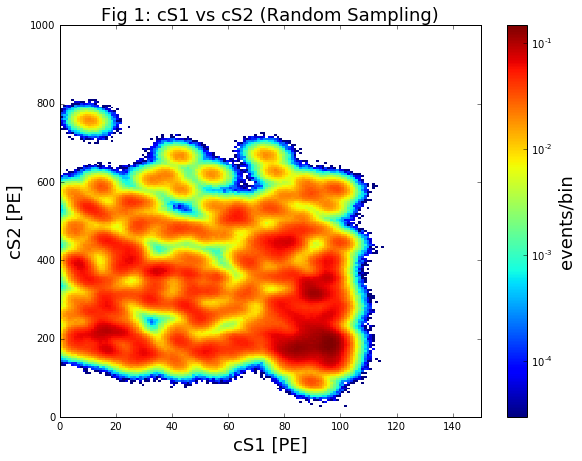

"hist_cs1_cs2_mc[hist_cs1_cs2_mc==0] = 1e-8\nnp.savetxt('hist_cs1_cs2_mc.txt',hist_cs1_cs2_mc)"

In [15]:
GetNewPlot('cS1 [PE]','cS2 [PE]')

weights_s2 = np.empty_like(df_s1_s2_r['cs2'].values)
weights_s2.fill(len(df_blind)/len(df_s1_s2_r))

hist_cs1_cs2_mc, x,y ,_ = plt.hist2d((df_s1_s2_r['cs1']),df_s1_s2_r['cs2'], 
                             weights = weights_s2, bins=(150,200),range=((0, 150),(0,1000)), norm=LogNorm())

plt.title('Fig 1: cS1 vs cS2 (Random Sampling)', fontsize = 18)

colorbar = plt.colorbar()
colorbar.set_label('events/bin',fontsize=18)

plt.show()

'''hist_cs1_cs2_mc[hist_cs1_cs2_mc==0] = 1e-8
np.savetxt('hist_cs1_cs2_mc.txt',hist_cs1_cs2_mc)'''

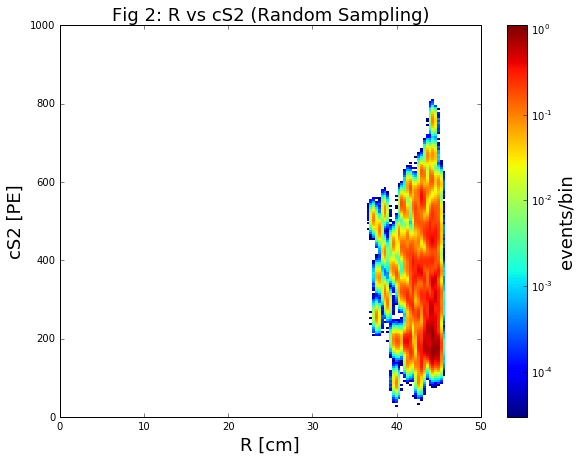

"hist_r_cs2_mc[hist_r_cs2_mc==0] = 1e-8\nnp.savetxt('hist_r_cs2_mc.txt',hist_r_cs2_mc)"

In [16]:
GetNewPlot('R [cm]','cS2 [PE]')

weights_s2 = np.empty_like(df_s1_s2_r['cs2'].values)
weights_s2.fill(len(df_blind)/len(df_s1_s2_r))

hist_r_cs2_mc, x,y ,_ = plt.hist2d((df_s1_s2_r['r']),df_s1_s2_r['cs2'], 
                             weights = weights_s2, bins=(150,200),range=((0, 50),(0,1000)), norm=LogNorm())

plt.title('Fig 2: R vs cS2 (Random Sampling)', fontsize = 18)

colorbar = plt.colorbar()
colorbar.set_label('events/bin',fontsize=18)

plt.show()

'''hist_r_cs2_mc[hist_r_cs2_mc==0] = 1e-8
np.savetxt('hist_r_cs2_mc.txt',hist_r_cs2_mc)'''

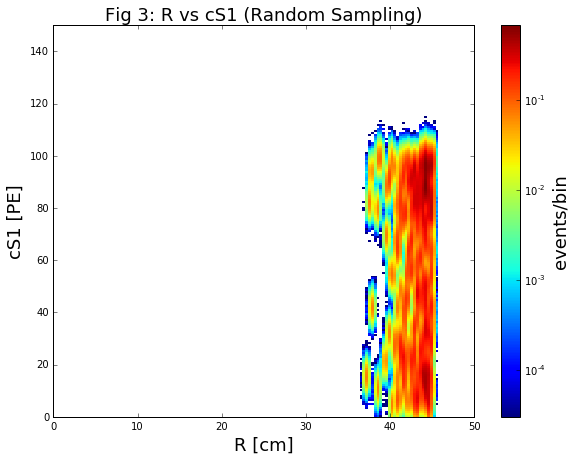

"hist_r_cs1_mc[hist_r_cs1_mc==0] = 1e-8\nnp.savetxt('hist_r_cs1_mc.txt',hist_r_cs1_mc)"

In [17]:
GetNewPlot('R [cm]','cS1 [PE]')

weights_s2 = np.empty_like(df_s1_s2_r['cs2'].values)
weights_s2.fill(len(df_blind)/len(df_s1_s2_r))

hist_r_cs1_mc, x,y ,_ = plt.hist2d((df_s1_s2_r['r']),df_s1_s2_r['cs1'], 
                             weights = weights_s2, bins=(150,200),range=((0, 50),(0,150)), norm=LogNorm())

plt.title('Fig 3: R vs cS1 (Random Sampling)', fontsize = 18)

colorbar = plt.colorbar()
colorbar.set_label('events/bin',fontsize=18)

plt.show()

'''hist_r_cs1_mc[hist_r_cs1_mc==0] = 1e-8
np.savetxt('hist_r_cs1_mc.txt',hist_r_cs1_mc)'''

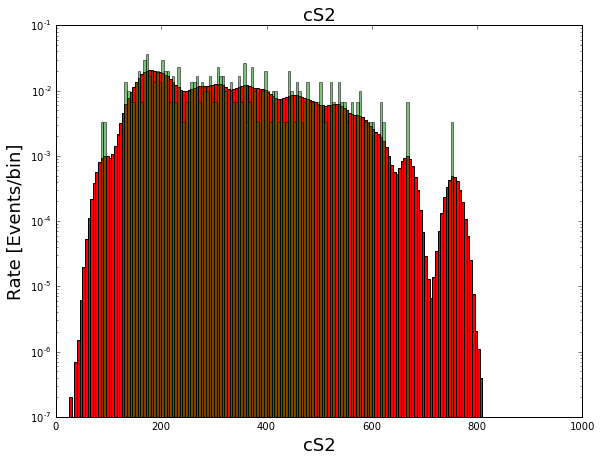

In [18]:
import matplotlib.ticker

GetNewPlot('cS2','Rate [Events/bin]')

weights_s2 = np.empty_like(df_s1_s2_r['cs2'].values)
weights_s2.fill(1./len(df_s1_s2_r))
#print (len(df_s1_s2_r))

hist_mc = plt.hist((df_s1_s2_r['cs2']), weights=weights_s2, cumulative=False, bins=200,range=(0,1000),
                           color='r',label='KDE Sampling')

weights_s2_data = np.empty_like(df_blind['cs2'].values)
weights_s2_data.fill(1./len(df_blind))

plt.hist((df_blind['cs2']), weights=weights_s2_data, cumulative=False,
         bins=200,range=(0,1000), color='g',alpha=0.5)

plt.title('cS2', fontsize = 18)
plt.yscale('log')


plt.show()

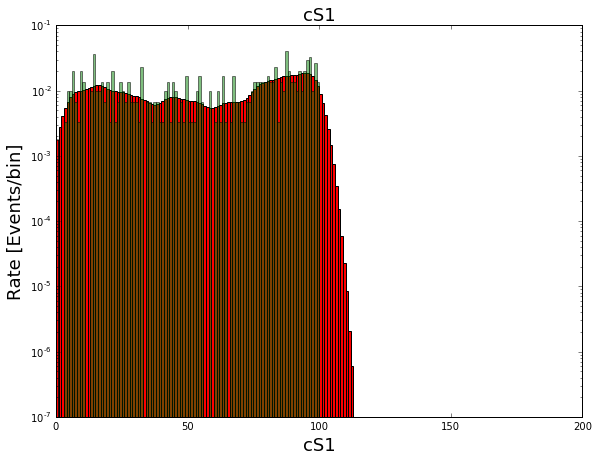

In [19]:
GetNewPlot('cS1','Rate [Events/bin]')

weights_s2 = np.empty_like(df_s1_s2_r['cs1'].values)
weights_s2.fill(1./len(df_s1_s2_r))
#print (len(df_s1_s2_r))

plt.hist((df_s1_s2_r['cs1']), weights=weights_s2, cumulative=False, bins=200,range=(0,200),
                           color='r',label='KDE Sampling')

weights_s2_data = np.empty_like(df_blind['cs2'].values)
weights_s2_data.fill(1./len(df_blind))

plt.hist((df_blind['cs1']), weights=weights_s2_data, cumulative=False,bins=200,range=(0,200),
         color='g',alpha=0.5)

#plt.xscale('log')
plt.title('cS1', fontsize = 18)

plt.yscale('log')
plt.show()

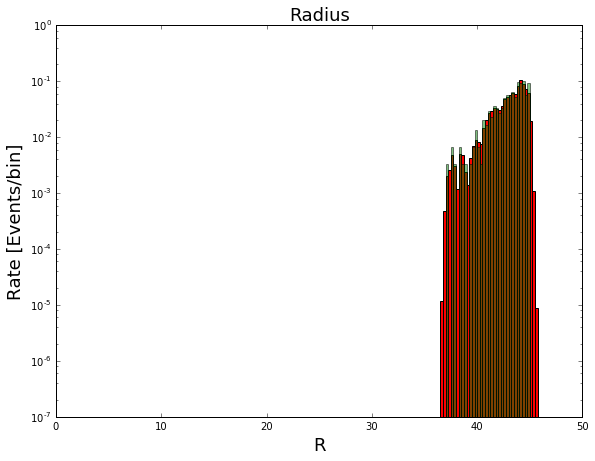

In [20]:

GetNewPlot('R','Rate [Events/bin]')


weights_s2 = np.empty_like(df_s1_s2_r['r'].values)
weights_s2.fill(1./len(df_s1_s2_r))
#print (len(df_s1_s2_r))

plt.hist((df_s1_s2_r['r']), weights=weights_s2, cumulative=False, bins=200,range=(0,50),
                           color='r',label='KDE Sampling')

weights_s2_data = np.empty_like(df_blind['cs2'].values)
weights_s2_data.fill(1./len(df_blind))

plt.hist(np.sqrt(df_blind['x']**2 + df_blind['y']**2), weights=weights_s2_data, cumulative=False,bins=200,range=(0,50),
         color='g',alpha=0.5)

#plt.xscale('log')
plt.title('Radius', fontsize = 18)

plt.yscale('log')
plt.show()